<a href="https://colab.research.google.com/github/shevtsovasofi/programming_sofi/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%226_scraping_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [32]:
!pip install beautifulsoup4 requests #загружаем библиотеку
#Импортируйте библиотеки для скрейпинга веб-страниц

import requests
from bs4 import BeautifulSoup

In [33]:
#допишем функцию для скрейпинга

def scrape_text_from_url(url, tag, class_=None):
    response = response = requests.get(url) #выполним HTML-запрос ###
    if response.status_code == 200: #если запрос успешный (возвращается значение 200) ###
      soup = BeautifulSoup(response.content, 'html.parser') #парсим контент или текст с помощью BeautifulSoup html.parser ###
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = '' #создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for p in paragraphs:  # перебираем элементы
            text += p.get_text() + "\n"
            text += p.get_text() # извлекаем текстовые данные
      return text
    else:
      print(f"Не удалось загрузить страницу. Ошибка {response.status_code}")
      return None
   ### ваш код здесь: иначе ###
      ### ваш код здесь: выводим статус-код и сообщение об ошибке ###

In [34]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\n\nThe Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can als

In [35]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.\nCivil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.\nA staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.\nGarland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.\nThis violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital

**Задание 2**
Написать функцию для сентимент-анализа

In [36]:
'''
Загружаем списки слов с положительным и отрицательным значением
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-11 18:37:24--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.3’

neg.txt.3           100%[===================>]  43.71K  --.-KB/s    in 0.008s  

2024-12-11 18:37:24 (5.14 MB/s) - ‘neg.txt.3’ saved [44759/44759]

--2024-12-11 18:37:24--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

In [37]:
'''
Создайте списки слов, разделив строку по знаку \n
'''

pos_list, neg_list = pos.split("\n"), neg.split("\n")

pos_list[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [38]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''
import spacy

nlp = spacy.load("en_core_web_sm")

def analyze_sentiment (text, positive_words, negative_words):
    doc = nlp(text.lower())
    words = [token.text for token in doc if not token.is_stop and not token.is_punct]

    positive_count = sum(1 for word in words if word in positive_words) #скор тональности
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count: #определяем тональность
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'


In [39]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

result = analyze_sentiment('This sample text is awesome!', pos_list, neg_list)
print(result)

positive


In [40]:
'''
Проверяем функцию для анализа тональности: пример 2
'''

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [41]:
'''
Проверяем функцию для анализа тональности: пример 3
'''

analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

**Задача 3**

Написать функцию для вывода сентимент-скоров

In [42]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_) #примените функцию scrape_text_from_url ###
  sentences = [sentence.strip() for sentence in scraped_text.split('.') if sentence.strip()] #сегментируйте текст по предложениям (через точку) ###
  sentiments = [] #создаем пустой список, куда запишем скоры ###
  for sentence in sentences: #начинаем перебор по предложениям ###
    score = analyze_sentiment(sentence, positive_words, negative_words) #получаем скор для данного предложения с помощью функции analyze_sentiment ###
    sentiments.append(score) #добавляем скор в созданный список ###
  return sentiments

In [43]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive']

In [44]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral']

**Задача 4**

Визуализировать результаты анализа

In [45]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1

Counter({'neutral': 22, 'negative': 52, 'positive': 12})

In [46]:
!pip install matplotlib

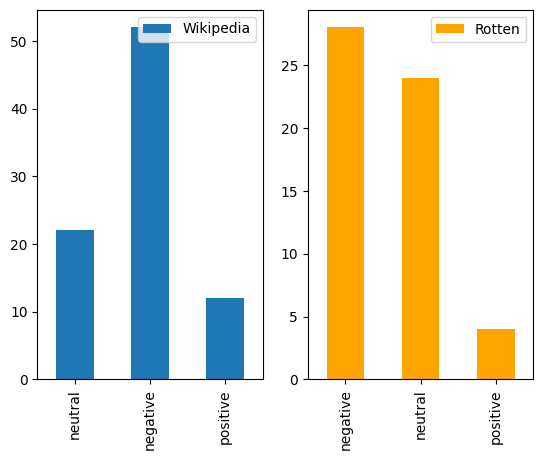

In [47]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Wikipedia'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Rotten'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать **рефакторинг**: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language's vocabulary (or alphabet) that are valid according to the language's syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).

The general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization of transformational-generative grammar (TGG). Marcel-Paul Schützenberger also played a role in the development of the theory of formal languages; the paper "The algebraic theory of context free languages" describes the modern hierarchy, including context-free grammars.

Independently, alongside linguists, mat

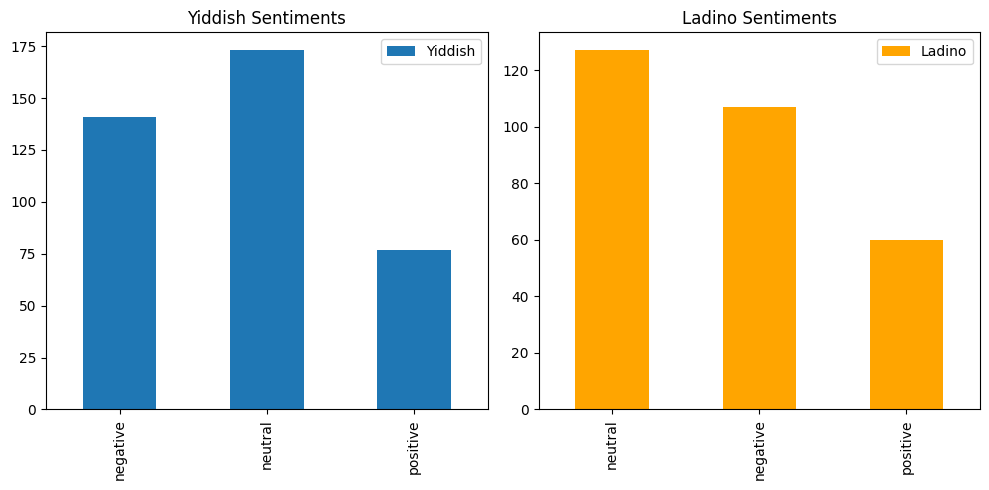

In [50]:
import requests #все импорты в начало - этот для загрузки данных с веб страниц
from bs4 import BeautifulSoup # обработка и парсинг HTML кодов
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt # для графиков

def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser') #парсим html
        paragraphs = soup.find_all(tag, class_)
        text = ''
        for p in paragraphs:
            for unwanted in p.find_all(['math', 'sup', 'sub']): #я пробовала без этого цикла, был очень странный вывод, погуглила - оказалось, это из-за отсутствия фильтрации
                unwanted.decompose()
            text += p.get_text() + "\n"
        return text
    else:
        print(f"Не удалось загрузить страницу. Ошибка {response.status_code}") #если ошибка запроса
        return None #мы загрузили текст с веб страницы, отфильтровали теги, которые не нужны, вернули чистый текст

result = scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p') #отскрейпили статью
print(result)

with open('neg.txt') as f:
    neg_list = f.read().splitlines() #загрузили информацию из текстовых файлов в список позитивных и негативных слов
with open('pos.txt') as f:
    pos_list = f.read().splitlines()

print(pos_list[:10]) #проверили

nlp = spacy.load("en_core_web_sm")

def analyze_sentiment(text, positive_words, negative_words):
    doc = nlp(text.lower())
    words = [token.text for token in doc if not token.is_stop and not token.is_punct] #удалили пунктуацию и стоп слова
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral' #сравнили количество позитивного и негативного, чтобы понять общую тональность текста

result1 = analyze_sentiment('This sample text is awesome!', pos_list, neg_list)
print(result1) #проверили

def analyze(positive_words, negative_words, url, tag, class_=None):
    scraped_text = scrape_text_from_url(url, tag, class_)
    if not scraped_text:
        return []
    sentences = [sentence.strip() for sentence in scraped_text.split('.') if sentence.strip()]
    sentiments = []
    for sentence in sentences:
        score = analyze_sentiment(sentence, positive_words, negative_words)
        sentiments.append(score)
    return sentiments
print(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]) #раделили текст со страницы на предложения и провели у них сентимент анализ

sample1 = Counter(analyze(pos, neg, url='https://en.wikipedia.org/wiki/Yiddish', tag='p'))
sample2 = Counter(analyze(pos, neg, url='https://en.wikipedia.org/wiki/Judaeo-Spanish', tag='p')) #для обеих страниц анализируем тональность каждого предложения и считаем результат
print(sample1)
print(sample2)

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Yiddish'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Ladino']) #заносим в табличку информацию по позитиву, негативу и нейтралу из статей про идиш и ладино

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
df1.plot.bar(ax=ax[0], title='Yiddish Sentiments')
df2.plot.bar(ax=ax[1], color='orange', title='Ladino Sentiments') #рисуем два графика. в тексте про идиш и позитива, и негатива больше:(
plt.tight_layout()
plt.show()
